**Project Details**

| | Details |
|----------|---------|
| Author   | Alfrethanov Christian Wijaya |
| Dataset  | Data.csv |
| Goal     | Perform Clustering for Top Football League Scores Dataset based on their performance from 2016 - 2020. |

# **Data Understanding**
### Dataset : **Data.csv** (*Top Football League Scores Dataset*)

###### Link : https://www.kaggle.com/datasets/mohamedhanyyy/top-football-leagues-scorers

<h2><b>Data Understanding</b></h2>

**Data.csv** merupakan sebuah dataset yang berisikan data-data mengenai pertandingan Sepak Bola yang telah dilakukan dari tahun 2016 sampai 2020. Data-data tersebut berupa ***Country***, ***League***, ***Club***, ***Player Names***, ***Matches_Played***, ***Substitution***, ***Mins***, ***Goals***, ***xG***, ***xG Per Avg Match***, ***Shots***, ***On Target***, ***Shots Per Avg Match***, ***On Target Per Avg Match***, dan ***Year***. Penjelasan lebih lanjut untuk masing-masing data tersebut dapat dilihat pada tabel **Deskripsi Data** pada sub-bab **Data Understanding** ini.

<br>

-------
<br>
<h2><b>Business Goals</b></h2>

Melakukan *Clustering* dari dataset **Data.csv** hanya untuk klub-klub sepakbola (*Football Clubs*) yang telah bermain selama lima tahun berturut-turut (2016 - 2020) berdasarkan data-data yang paling menentukan performa suatu klub sepakbola, yaitu *Goals*, *Mins_Per_On_Target_Shot*, *Mins_Per_Goal*, *Goals-xG*, *Shots_Efficiency*, dan *Target_Accuracy*. Sebagian dari data-data tersebut harus diperoleh dengan suatu proses perhitungan matematis, seperti misalnya data *Mins_Per_On_Target_Shot*, *Mins_Per_Goal*, *Shots_Efficiency*, *Goals-xG*, dan *Target_Accuracy*. Upaya Clustering ini juga dilakukan untuk menemukan perkiraan atau prediksi mengenai berapa kisaran data *Goals*, *Mins_Per_On_Target_Shot*, *Mins_Per_Goal*, *Goals-xG*, *Shots_Efficiency*, dan *Target_Accuracy* yang harus ditempuh untuk menjadi klub sepakbola yang terbaik di antara yang lainnya.

<br>

-------
<br>
<h2><b>Deskripsi Data</b></h2>

1. Data-data dalam dataset **Data.csv** :

| # | Data | Description
| --- | --- | --- 
| 1 | **Country** | Negara-negara tempat pertandingan sepakbola diadakan
| 2 | **League** | Nama-nama liga sepakbola
| 3 | **Club** | Nama-nama klub sepakbola
| 4 | **Player Names** | Nama-nama pemain sepakbola
| 5 | **Matches_Played** | Total pertandingan yang dimainkan
| 6 | **Substitutions** | Jumlah Substitusi
| 7 | **Mins** | Total waktu (menit) lama permainan
| 8 | **Goals** | Jumlah gol yang dicetak
| 9 | **xG** | Total hasil cetakan gol yang diekspektasikan berdasarkan perhitungan Statistik
| 10 | **xG Per Avg Match** | Total hasil cetakan gol yang diekspektasikan berdasarkan perhitungan Statistik per rata-rata pertandingan
| 11 | **Shots** | Total tembakan yang telah dilakukan
| 12 | **On Target** | Total tembakan yang benar-benar mengarah ke Gawang Lawan yang telah dilakukan
| 13 | **Shots Per Avg Match** | Total tembakan yang telah dilakukan per rata-rata pertandingan
| 14 | **On Target Per Avg Match** | Total tembakan yang benar-benar mengarah ke Gawang Lawan yang telah dilakukan per rata-rata pertandingan
| 15 | **Year** | Tahun berjalannya pertandingan

<br>

2. Data-data yang digunakan untuk proses *Clustering* yang diperoleh dari dataset **Data.csv** :

| # | Data | Description
| --- | --- | --- 
| 1 | **Goals** | Jumlah gol yang dicetak di mana semakin besar / tinggi nilai ***Goals*** semakin baik klub tersebut
| 2 | **Mins_Per_On_Target_Shot** | Total waktu (menit) per tembakan yang tepat diarahkan ke Gawang Lawan di mana semakin kecil / rendah nilai ***Mins_Per_On_Target_Shot*** semakin baik klub tersebut
| 3 | **Mins_Per_Goal** | Total waktu (menit) per cetakan gol di mana semakin kecil / rendah nilai ***Mins_Per_Goal*** semakin baik klub tersebut
| 4 | **Goals-xG** | Jarak Perbedaan antara total hasil gol yang dicetak dengan total cetakan gol yang diekspektasikan di mana semakin kecil / rendah nilai ***Goals-xG*** semakin baik klub tersebut
| 5 | **Target_Accuracy** | Nilai akurasi terhadap tiap-tiap tembakan yang telah dilakukan yang diperhitungkan dari berapa banyak tembakan yang benar-benar telah mencetak gol setelah sekian banyak tembakan telah dilakukan di mana semakin besar / tinggi nilai ***Target_Accuracy*** semakin baik klub tersebut
| 6 | **Shots_Efficiency** | Keefisienan tiap-tiap tembakan yang dilakukan di mana semakin besar / tinggi nilai ***Shots_Efficiency*** semakin baik klub tersebut

----

<h2><b>START</b></h2>

<br>

----

<h2><b>Data Understanding</b></h2>

Melakukan proses pemahaman mendasar terhadap dataset yang akan dianalisis.

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import seluruh library yang diperlukan.

In [ ]:
# Import Dataset Data.csv (Top Football League Scores Dataset)
df = pd.read_csv('Data.csv')

Import dataset **Data.csv**.

In [ ]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [ ]:
# Total Rows and Columns in the Dataset
df.shape

(660, 15)

Terdapat 660 baris dan lima belas (15) kolom pada dataset **Data.csv**

In [ ]:
# Statistical Value of each Numerical Data in the Dataset
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


Deskripsi Statistik dari data-data numerik pada dataset **Data.csv**

In [ ]:
# Details about the Dataset (data types, sum of each data types, total columns and rows, row names, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

Informasi detail dari dataset **Data.csv**.

<br>

**Kesimpulan :**
1. 4 data dengan tipe data **Object**
2. 7 data dengan tipe data **Integer**
3. 4 data dengan tipe data **Float**
4. Tidak terdapat *Missing Value* pada dataset **Data.csv**

----

----

# **Data Preparation**
### Dataset : **Data.csv** (*Top Football League Scores Dataset*)

<h2><b>Data Preparation</b></h2>

Pada tahap ini, dilakukan proses *Data Preparation*, yaitu suatu proses untuk mempersiapkan data-data yang diperlukan untuk mencapai *Business Goals*. Proses yang dilakukan pada tahap ini, yaitu proses Data Cleaning dan proses pembuatan Data-data Baru yang diperlukan dengan menggunakan proses matematis. Data-data Baru yang diperlukan tersebut adalah data *Minutes Per On Target Shot*, *Minutes Per Goal*, *Goals - xG*, *Shots Efficiency*, dan *Target Accuracy*.

In [ ]:
# Missing Value Check
df.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

Memastikan tidak terdapat Missing Value pada Dataset **Data.csv**.

In [ ]:
x = df["Club"].value_counts() == 5
clubs_5years = x[x].index
clubs_5years

Index(['(PSV)', '(FLU)', '(STR)', '(EVE)', '(GET)', '(SEV)', '(ACM)'], dtype='object')

Klub-klub Sepakbola yang telah bermain selama lima tahun berturut-turut (2016-2020) adalah **PSV**, **FLU**, **STR**, **EVE**, **GET**, **SEV**, dan **ACM**.

In [ ]:
df_topclubs = df[df['Club'].isin(clubs_5years)]
df_topclubs.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
76,England,Premier League,(ACM),Zlatan Ibrahimovic,27,1,2578,17,15.74,0.58,115,45,4.24,1.66,2016
95,Brazil,Campeonato Brasileiro SÃ©rie A,(FLU),Fred,33,1,2821,14,13.66,0.46,63,28,2.12,0.94,2016
100,Spain,La Liga,(GET),Angel Rodriguez,26,7,2390,13,11.82,0.47,68,31,2.70,1.23,2017
119,Spain,La Liga,(SEV),Munir,28,5,2517,10,10.60,0.40,62,23,2.34,0.87,2017
166,Brazil,Campeonato Brasileiro SÃ©rie A,(FLU),Fred,27,2,1865,12,12.56,0.64,57,24,2.90,1.22,2017


Melakukan *filter* terhadap dataset **Data.csv** dengan hanya mengambil data-data dari klub-klub sepakbola yang telah bermain selama lima tahun berturut-turut (**PSV**, **FLU**, **STR**, **EVE**, **GET**, **SEV**, dan **ACM**) dan memasukkan data-data tersebut ke dalam sebuah dataset baru bernama **df_topclubs**.

In [ ]:
df_topclubs["Goals-xG"] = df_topclubs['Goals'] - df_topclubs['xG']
df_topclubs["Target_Accuracy"] = (df_topclubs['On Target Per Avg Match']/df_topclubs['Shots Per Avg Match'])*100
df_topclubs["Shots_Efficiency"] = (df_topclubs['Goals']/df_topclubs['OnTarget'])*100

df_tops = df_topclubs[df_topclubs['Club'].isin(clubs_5years)]
df_tops["Mins_Per_Goal"] = df_tops['Mins']/df_tops['Goals']
df_tops["Mins_Per_On_Target_Shot"] = df_tops['Mins']/df_tops['OnTarget']

df_tops.head()

<ipython-input-10-34bf5c5ec438>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topclubs["Goals-xG"] = df_topclubs['Goals'] - df_topclubs['xG']
<ipython-input-10-34bf5c5ec438>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topclubs["Target_Accuracy"] = (df_topclubs['On Target Per Avg Match']/df_topclubs['Shots Per Avg Match'])*100
<ipython-input-10-34bf5c5ec438>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot
76,England,Premier League,(ACM),Zlatan Ibrahimovic,27,1,2578,17,15.74,0.58,115,45,4.24,1.66,2016,1.26,39.150943,37.777778,151.647059,57.288889
95,Brazil,Campeonato Brasileiro SÃ©rie A,(FLU),Fred,33,1,2821,14,13.66,0.46,63,28,2.12,0.94,2016,0.34,44.339623,50.000000,201.500000,100.750000
100,Spain,La Liga,(GET),Angel Rodriguez,26,7,2390,13,11.82,0.47,68,31,2.70,1.23,2017,1.18,45.555556,41.935484,183.846154,77.096774
119,Spain,La Liga,(SEV),Munir,28,5,2517,10,10.60,0.40,62,23,2.34,0.87,2017,-0.60,37.179487,43.478261,251.700000,109.434783
166,Brazil,Campeonato Brasileiro SÃ©rie A,(FLU),Fred,27,2,1865,12,12.56,0.64,57,24,2.90,1.22,2017,-0.56,42.068966,50.000000,155.416667,77.708333


Membuat lima (5) data baru dengan proses perhitungan matematis yang dimasukkan ke dalam sebuah dataset baru bernama **df_tops** yang mengandung data-data seluruh klub sepakbola yang telah bermain selama lima tahun berturut-turut (2016-2020), yaitu **Goals-xG**, **Target_Accuracy**, **Shots_Efficiency**, **Mins_Per_Goal**, dan **Mins_Per_On_Target_Shot**.

<br>

Keterangan :
1. **Goals-xG**
   - Goals-xG > 0 : Pencetakan Gol di atas ekspektasi
   - Goals-xG < 0 : Pencetakan Gol di bawah ekspektasi
   - Goals-xG = 0 : Pencetakan Gol sesuai ekspektasi

In [ ]:
# Create New Dataset for Clustering
df_tops_1 = df_tops.copy()

# Create New Dataset to create the Final Dataset
df_tops_2 = df_tops.copy()

Membuat dua buah dataset baru dengan meng-*copy* dataset **df_tops** untuk keperluan pembuatan dataset final dan dataset yang mengandung data-data final untuk melakukan *Clustering*

In [ ]:
df_tops_1.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot
76,England,Premier League,(ACM),Zlatan Ibrahimovic,27,1,2578,17,15.74,0.58,115,45,4.24,1.66,2016,1.26,39.150943,37.777778,151.647059,57.288889
95,Brazil,Campeonato Brasileiro SÃ©rie A,(FLU),Fred,33,1,2821,14,13.66,0.46,63,28,2.12,0.94,2016,0.34,44.339623,50.000000,201.500000,100.750000
100,Spain,La Liga,(GET),Angel Rodriguez,26,7,2390,13,11.82,0.47,68,31,2.70,1.23,2017,1.18,45.555556,41.935484,183.846154,77.096774
119,Spain,La Liga,(SEV),Munir,28,5,2517,10,10.60,0.40,62,23,2.34,0.87,2017,-0.60,37.179487,43.478261,251.700000,109.434783
166,Brazil,Campeonato Brasileiro SÃ©rie A,(FLU),Fred,27,2,1865,12,12.56,0.64,57,24,2.90,1.22,2017,-0.56,42.068966,50.000000,155.416667,77.708333


In [ ]:
df_tops_2.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot
76,England,Premier League,(ACM),Zlatan Ibrahimovic,27,1,2578,17,15.74,0.58,115,45,4.24,1.66,2016,1.26,39.150943,37.777778,151.647059,57.288889
95,Brazil,Campeonato Brasileiro SÃ©rie A,(FLU),Fred,33,1,2821,14,13.66,0.46,63,28,2.12,0.94,2016,0.34,44.339623,50.000000,201.500000,100.750000
100,Spain,La Liga,(GET),Angel Rodriguez,26,7,2390,13,11.82,0.47,68,31,2.70,1.23,2017,1.18,45.555556,41.935484,183.846154,77.096774
119,Spain,La Liga,(SEV),Munir,28,5,2517,10,10.60,0.40,62,23,2.34,0.87,2017,-0.60,37.179487,43.478261,251.700000,109.434783
166,Brazil,Campeonato Brasileiro SÃ©rie A,(FLU),Fred,27,2,1865,12,12.56,0.64,57,24,2.90,1.22,2017,-0.56,42.068966,50.000000,155.416667,77.708333


In [ ]:
# Create the Final Dataset
df_tops_2.drop(['Country','League', 'Player Names', 'Matches_Played', 'Substitution ', 'Mins', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'], axis=1, inplace=True)
df_final = df_tops_2

df_final.head()

,Club,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot
76,(ACM),17,1.26,39.150943,37.777778,151.647059,57.288889
95,(FLU),14,0.34,44.339623,50.000000,201.500000,100.750000
100,(GET),13,1.18,45.555556,41.935484,183.846154,77.096774
119,(SEV),10,-0.60,37.179487,43.478261,251.700000,109.434783
166,(FLU),12,-0.56,42.068966,50.000000,155.416667,77.708333


Membuat dataset final dengan nama **df_final** yang hanya mengandung data-data yang diperlukan untuk melakukan *Clustering* beserta nama klub sepakbolanya, yaitu data *Club*, *Goals*, *Goals-xG*, *Target_Accuracy*, *Shots_Efficiency*, *Mins_Per_Goal*, dan *Mins_Per_On_Target_Shot*.

In [ ]:
df_final

,Club,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot
76,(ACM),17,1.26,39.150943,37.777778,151.647059,57.288889
95,(FLU),14,0.34,44.339623,50.000000,201.500000,100.750000
100,(GET),13,1.18,45.555556,41.935484,183.846154,77.096774
119,(SEV),10,-0.60,37.179487,43.478261,251.700000,109.434783
166,(FLU),12,-0.56,42.068966,50.000000,155.416667,77.708333
174,(FLU),13,1.89,41.800643,32.500000,225.615385,73.325000
183,(GET),14,1.56,42.201835,56.000000,183.500000,102.760000
224,(ACM),11,1.83,45.878136,39.285714,188.636364,74.107143
258,(STR),10,2.97,52.830189,52.631579,215.400000,113.368421
266,(EVE),14,2.12,33.691756,50.000000,201.571429,100.785714


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 76 to 659
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Club                     35 non-null     object 
 1   Goals                    35 non-null     int64  
 2   Goals-xG                 35 non-null     float64
 3   Target_Accuracy          35 non-null     float64
 4   Shots_Efficiency         35 non-null     float64
 5   Mins_Per_Goal            35 non-null     float64
 6   Mins_Per_On_Target_Shot  35 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ KB


Seluruh data dalam **df_final** memiliki data dengan tipe data berupa 1 data bertipe data *Object*, 1 data bertipe data *Integer*, dan 5 data bertipe data *Float*.

In [ ]:
df_final.shape

(35, 7)

**df_final** terdiri dari tiga puluh lima (35) baris dan tujuh (7) kolom.

In [ ]:
# Create the New Dataset that only contains the datas which is needed to do Clustering
df_tops_1.drop(['Country','League', 'Club', 'Player Names', 'Matches_Played', 'Substitution ', 'Mins', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'], axis=1, inplace=True)
data_final = df_tops_1

data_final.head()

,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot
76,17,1.26,39.150943,37.777778,151.647059,57.288889
95,14,0.34,44.339623,50.000000,201.500000,100.750000
100,13,1.18,45.555556,41.935484,183.846154,77.096774
119,10,-0.60,37.179487,43.478261,251.700000,109.434783
166,12,-0.56,42.068966,50.000000,155.416667,77.708333


Membuat dataset dengan data-data yang sudah final dengan nama **data_final** yang hanya mengandung data-data yang diperlukan untuk melakukan *Clustering*, yaitu data *Goals*, *Goals-xG*, *Target_Accuracy*, *Shots_Efficiency*, *Mins_Per_Goal*, dan *Mins_Per_On_Target_Shot*.

In [ ]:
data_final

,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot
76,17,1.26,39.150943,37.777778,151.647059,57.288889
95,14,0.34,44.339623,50.000000,201.500000,100.750000
100,13,1.18,45.555556,41.935484,183.846154,77.096774
119,10,-0.60,37.179487,43.478261,251.700000,109.434783
166,12,-0.56,42.068966,50.000000,155.416667,77.708333
174,13,1.89,41.800643,32.500000,225.615385,73.325000
183,14,1.56,42.201835,56.000000,183.500000,102.760000
224,11,1.83,45.878136,39.285714,188.636364,74.107143
258,10,2.97,52.830189,52.631579,215.400000,113.368421
266,14,2.12,33.691756,50.000000,201.571429,100.785714


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 76 to 659
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Goals                    35 non-null     int64  
 1   Goals-xG                 35 non-null     float64
 2   Target_Accuracy          35 non-null     float64
 3   Shots_Efficiency         35 non-null     float64
 4   Mins_Per_Goal            35 non-null     float64
 5   Mins_Per_On_Target_Shot  35 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.9 KB


Seluruh data dalam **data_final** memiliki data dengan tipe data berupa 1 data bertipe data *Integer* dan 5 data bertipe data *Float*.

In [ ]:
data_final.shape

(35, 6)

**data_final** terdiri dari tiga puluh lima (35) baris dan enam (6) kolom.

----

<h2><b>Normalization</b></h2>

Dilakukan Normalisasi / *Normalization* dengan fitur bawaan **StandardScaler** dari library Scikit-Learn (sklearn). Dilakukan Normalisasi dengan tujuan untuk mengubah nilai kolom numerik dalam himpunan data untuk menggunakan skala umum, tanpa mendistorsi perbedaan dalam rentang nilai atau kehilangan informasi sehingga data-data yang nilainya terlalu besar ataupun kecil tidak memengaruhi Model sehingga kita dapat membuat Model dengan benar.

In [ ]:
# Import Libraries that is needed to complete the Clustering Algorithm
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import math as m

# Normalization
df_scale = data_final

sc = StandardScaler()

df_normalized = pd.DataFrame(sc.fit_transform(df_scale), columns=df_scale.columns)
df_normalized

,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot
0,1.304959,-0.182394,-0.533342,-0.759733,-0.650684,-1.045383
1,0.679294,-0.657561,0.276807,0.252672,0.093326,0.392482
2,0.470739,-0.223713,0.466660,-0.415337,-0.170141,-0.390060
3,-0.154927,-1.143059,-0.841161,-0.287544,0.842516,0.679809
4,0.262184,-1.122400,-0.077728,0.252672,-0.594426,-0.369827
5,0.470739,0.142993,-0.119624,-1.196908,0.453227,-0.514845
6,0.679294,-0.027448,-0.056982,0.749671,-0.175307,0.458981
7,0.053628,0.112004,0.517028,-0.634826,-0.098652,-0.488969
8,-0.154927,0.700799,1.602506,0.470654,0.300771,0.809949
9,0.679294,0.261785,-1.385728,0.252672,0.094392,0.393664


---

<h2><b>PCA</b></h2>

**PCA** merupakan fitur bawaan dari modul decomposition dalam Library Scikit-Learn (sklearn). **Principal Component Analysis** (PCA) merupakan salah satu metode reduksi dimensi pada Machine Learning. PCA akan memilih variabel-variabel yang mampu menjelaskan sebagian besar variabilitas data. PCA akan mengurangi dimensi dengan membentuk variabel-variabel baru yang disebut **Principal Components**. Pada kasus kali ini, PCA dibuat dengan 3 Komponen (Principal Components) yang diberi nama PC1, PC2, dan PC3.

In [ ]:
# PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_normalized)
principalData = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3'])

principalData

,PC1,PC2,PC3
0,1.096990,-0.903228,0.305217
1,-0.199771,-0.103886,-0.038878
2,0.611990,-0.398365,-0.391646
3,-1.609540,-0.414397,-0.314868
4,0.141802,0.469090,-0.387043
5,0.308451,-1.320592,-0.265809
6,-0.065303,0.271719,0.724651
7,0.664710,-0.420398,-0.532375
8,0.238028,0.264783,-0.207310
9,-0.595729,-0.322401,1.351315


----

----

# **Data Visualization** & **K-Means Algorithm**
### Dataset : **Data.csv** (*Top Football League Scores Dataset*)

<h2><b>visualize_clustering() Function</b></h2>

Pembuatan Fungsi **visualize_clustering()** yang akan dipanggil / digunakan pada saat melakukan *visualisasi* terhadap hasil *Clustering* yang diperoleh dengan menggunakan algoritma **K-Means**.

In [ ]:
def visualize_clustering(data, predictions=None, marker_size=4, title="Principal Components in 3-Dimensions"):
  if predictions is not None:
    data['preds'] = predictions
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='preds',
                      color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)
  else:
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                        color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)

  fig.update_traces(marker_size = marker_size)
  fig.update_layout(title_text=title, title_x=0.5)
  fig.show()

----

<h2><b>Best K Value / Nilai K Terbaik</b></h2>

**Elbow Method**

Melakukan visualisasi **Elbow Method** untuk menentukan nilai K / jumlah *Cluster* terbaik untuk melakukan algoritma **K-Means**.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

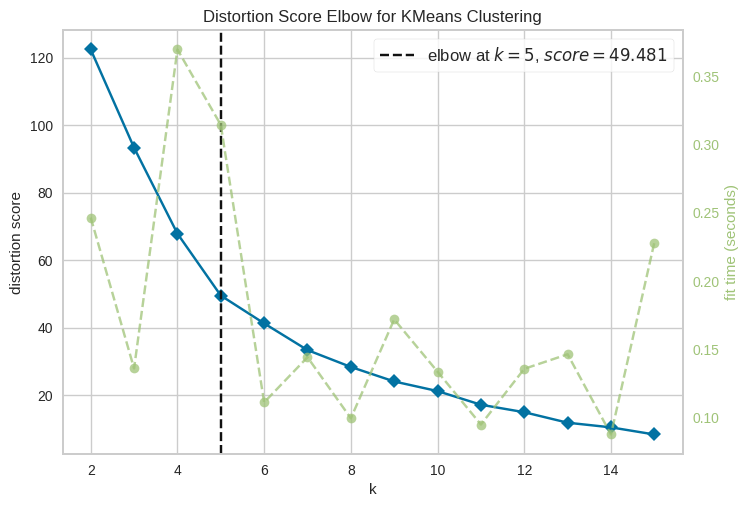

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method
visualizer = KElbowVisualizer(KMeans(), k=15)

visualizer.fit(principalData)
visualizer.show()

Jika dilihat dari visualisasi **Elbow Method** di atas, dapat kita simpulkan bahwa nilai K / jumlah *Cluster* terbaik untuk melakukan algoritma **K-Means** adalah **5**.

<br>

Kesimpulan :

**K = 5**

----

<h2><b>Inertia Evaluation</b></h2>

Melakukan **Inertia Evaluation** untuk melihat perbandingan nilai *Inertia* antar nilai K. Apabila perbedaan nilai *Inertia* antara suatu nilai K dengan nilai K berikutnya sampai seterus-seterusnya sudah mulai tidak terlalu besar dibandingkan dengan perbedaan-perbedaan nilai *Inertia* antar nilai K sebelum-sebelumnya, maka nilai K tersebut dapat disimpulkan menjadi nilai K terbaik untuk pembuatan Model *Clustering*.

In [ ]:
# Inertia Evaluation
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, random_state = 0)
    kmeans = kmeans.fit(principalData)
    labels = kmeans.predict(principalData)
    inertia = kmeans.inertia_
    print("K:", k, inertia)
    print("")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 1 180.99276945862238

K: 2 122.37963981858411

K: 3 97.78263585268468

K: 4 67.8356479878417

K: 5 50.08514241904833

K: 6 41.794511025374035

K: 7 34.89145512666569



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 8 30.407937643944706

K: 9 24.063496430442036

K: 10 21.461712302904584



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dari hasil **Inertia Evaluation** di atas, dapat kita lihat bahwa pada saat nilai K = 5, antara nilai K = 5 dan K = 6, perbedaan nilainya sudah tidak terlalu besar sehingga dapat disimpulkan bahwa K = 5 memang merupakan nilai K terbaik untuk Model *Clustering*-nya

----

<h2><b>K-Means</b></h2>

Melakukan Algoritma **K-Means** untuk melakukan *Clustering* dengan jumlah *Cluster* atau nilai K sebanyak 5 (**K = 5**). Selain itu, pada tahap ini juga dilakukan Visualisasi terhadap hasil *Clustering* yang telah diperoleh.

In [ ]:
# K-Means
kmeans = KMeans(n_clusters = 5)
kmeans.fit(principalData)

# Visualize the Clusters that was resulted from K-Means Algorithm implementation
visualize_clustering(principalData, kmeans.labels_, title="KMeans Clustering dengan nilai K = 5")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Grafik 3D (3 Dimensi) di atas merupakan hasil visualisasi dari *Cluster-cluster* yang telah terbentuk dari proses algoritma **K-Means** dengan jumlah *Cluster* sebanyak lima (5) (**K = 5**) dan PCA sebanyak tiga (3) komponen (**PCA = 3**). Perlu diketahui bahwa *Cluster-cluster* tersebut terbentuk karena saling adanya karakteristik-karakteristik yang sama pada masing-masing data yang satu dengan yang lainnya.

<br>

*Cluster* :
1. Biru (*Cluster* 0)
2. Ungu (*Cluster* 1)
3. Pink (*Cluster* 2)
4. Oranye (*Cluster* 3)
5. Kuning (*Cluster* 4)

----

<h2><b>Clusters Centroid</b></h2>

Di bawah ini merupakan Titik Pusat (**Centroid**) tiap Cluster.

In [ ]:
print(kmeans.cluster_centers_)

[[-2.17801929 -0.34431821 -0.11996352]
 [ 1.71794856  0.91433659 -0.57530504]
 [-0.04001733 -0.40651365 -0.03012226]
 [ 4.06016829 -1.94228839  3.66394518]
 [-1.8373097   4.35506885  2.3204404 ]]


----

----

# **Model Evaluation**
### Dataset : **Data.csv** (*Top Football League Scores Dataset*)

<h2><b>Silhouette Score Evaluation</b></h2>

Nilai hasil **Silhouette Coefficient** terletak pada kisaran nilai -1.00 hingga 1.00. Semakin mendekati nilai 1.00, maka semakin baik pengelompokan data dalam suatu *cluster*. Sebaliknya jika semakin mendekati nilai -1.00, maka semakin buruk pengelompokan data dalam suatu *cluster*.

In [ ]:
# Silhouette Score of the Clustering Model with K = 5 (5 Clusters)
print("Silhouette Score : ")
silhouette_score(principalData, kmeans.labels_)

Silhouette Score : 


0.40315614540317435

Dari hasil **Silhouette Score Evaluation** di atas, dapat disimpulkan bahwa dalam melakukan *Clustering* dengan algoritma K-Means untuk dataset **Data.csv** (*Top Football League Scorers Dataset*) dengan nilai **K = 5** (*5 Clusters*), hasil pengelompokan data dalam suatu *cluster*-nya sudah cukup baik karena nilai **Silhouette Coefficient** mendekati nilai 1.00, yaitu 0.40315614540317435.

----

----

# **Final Result**
### Dataset : **Data.csv** (*Top Football League Scores Dataset*)

<h2><b>Cluster Data of Each Clubs</b></h2>

Membuat satu (1) buah kolom baru yang bernama *Cluster* yang mengandung data *cluster* dari tiap klub sepakbola. Oleh karena itu, pada sub-bab ini, kita dapat melihat masing-masing klub sepakbola memasuki *cluster* ke-0, 1, 2, 3, atau 4.

In [ ]:
# Create a new column named 'Cluster' that contains the Cluster data of each rows
df_final["Cluster"] = kmeans.labels_
df_final

,Club,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot,Cluster
76,(ACM),17,1.26,39.150943,37.777778,151.647059,57.288889,2
95,(FLU),14,0.34,44.339623,50.000000,201.500000,100.750000,2
100,(GET),13,1.18,45.555556,41.935484,183.846154,77.096774,2
119,(SEV),10,-0.60,37.179487,43.478261,251.700000,109.434783,0
166,(FLU),12,-0.56,42.068966,50.000000,155.416667,77.708333,2
174,(FLU),13,1.89,41.800643,32.500000,225.615385,73.325000,2
183,(GET),14,1.56,42.201835,56.000000,183.500000,102.760000,2
224,(ACM),11,1.83,45.878136,39.285714,188.636364,74.107143,2
258,(STR),10,2.97,52.830189,52.631579,215.400000,113.368421,2
266,(EVE),14,2.12,33.691756,50.000000,201.571429,100.785714,2


----

<h2><b>Cluster 0</b></h2>

Menampilkan data-data klub sepakbola yang memasuki *Cluster* 0.

In [ ]:
df_final[df_final['Cluster'] == 0]

,Club,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot,Cluster
119,(SEV),10,-0.60,37.179487,43.478261,251.700000,109.434783,0
294,(FLU),8,0.51,34.449761,40.000000,329.500000,131.800000,0
323,(SEV),10,-0.48,40.217391,52.631579,242.800000,127.789474,0
338,(GET),11,-1.00,39.682540,47.826087,265.727273,127.086957,0
426,(STR),7,1.75,36.073059,38.888889,309.714286,120.444444,0
595,(STR),4,0.39,46.875000,50.000000,252.000000,126.000000,0
657,(PSV),7,1.28,30.939227,50.000000,337.571429,168.785714,0


Klub-klub sepakbola yang memasuki *Cluster* 0 adalah klub-klub yang memiliki karakteristik sebagai berikut :
1. Rata-rata **Goals** : 8.14
2. Rata-rata **Goals-xG** : 0.26
3. Rata-rata **Target_Accuracy** : 37.92
4. Rata-rata **Shots_Efficiency** : 46.12
5. Rata-rata **Mins_Per_Goal** : 284.14
6. Rata-rata **Mins_Per_On_Target_Shot** : 130.19

----

<h2><b>Cluster 1</b></h2>

Menampilkan data-data klub sepakbola yang memasuki *Cluster* 1.

In [ ]:
df_final[df_final['Cluster'] == 1]

,Club,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot,Cluster
398,(ACM),11,4.15,47.348485,55.000000,137.636364,75.700000,1
489,(PSV),6,-0.11,53.221957,35.294118,120.833333,42.647059,1
490,(PSV),4,1.13,41.233766,57.142857,131.000000,74.857143,1
537,(GET),4,1.94,50.188679,57.142857,125.250000,71.571429,1
558,(ACM),10,2.08,45.728643,62.500000,55.700000,34.812500,1
602,(EVE),10,2.88,56.346749,55.555556,94.000000,52.222222,1
645,(SEV),13,5.89,50.803859,38.235294,157.461538,60.205882,1
653,(PSV),11,2.09,54.222222,34.375000,113.181818,38.906250,1


Klub-klub sepakbola yang memasuki *Cluster* 1 adalah klub-klub yang memiliki karakteristik sebagai berikut :
1. Rata-rata **Goals** : 8.63
2. Rata-rata **Goals-xG** : 2.51
3. Rata-rata **Target_Accuracy** : 49.89
4. Rata-rata **Shots_Efficiency** : 49.41
5. Rata-rata **Mins_Per_Goal** : 116.88
6. Rata-rata **Mins_Per_On_Target_Shot** : 56.37

----

<h2><b>Cluster 2</b></h2>

Menampilkan data-data klub sepakbola yang memasuki *Cluster* 2.

In [ ]:
df_final[df_final['Cluster'] == 2]

,Club,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot,Cluster
76,(ACM),17,1.26,39.150943,37.777778,151.647059,57.288889,2
95,(FLU),14,0.34,44.339623,50.000000,201.500000,100.750000,2
100,(GET),13,1.18,45.555556,41.935484,183.846154,77.096774,2
166,(FLU),12,-0.56,42.068966,50.000000,155.416667,77.708333,2
174,(FLU),13,1.89,41.800643,32.500000,225.615385,73.325000,2
183,(GET),14,1.56,42.201835,56.000000,183.500000,102.760000,2
224,(ACM),11,1.83,45.878136,39.285714,188.636364,74.107143,2
258,(STR),10,2.97,52.830189,52.631579,215.400000,113.368421,2
266,(EVE),14,2.12,33.691756,50.000000,201.571429,100.785714,2
274,(EVE),13,1.88,38.461538,39.393939,254.000000,100.060606,2


Klub-klub sepakbola yang memasuki *Cluster* 2 adalah klub-klub yang memiliki karakteristik sebagai berikut :
1. Rata-rata **Goals** : 11.94
2. Rata-rata **Goals-xG** : 1.42
3. Rata-rata **Target_Accuracy** : 41.92
4. Rata-rata **Shots_Efficiency** : 43.27
5. Rata-rata **Mins_Per_Goal** : 205.36
6. Rata-rata **Mins_Per_On_Target_Shot** : 88.21

----

<h2><b>Cluster 3</b></h2>

Menampilkan data-data klub sepakbola yang memasuki *Cluster* 3.

In [ ]:
df_final[df_final['Cluster'] == 3]

,Club,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot,Cluster
302,(ACM),31,8.28,42.063492,46.268657,96.709677,44.746269,3


Klub-klub sepakbola yang memasuki *Cluster* 3 adalah klub-klub yang memiliki karakteristik sebagai berikut :
1. Rata-rata **Goals** : 31.00
2. Rata-rata **Goals-xG** : 8.28
3. Rata-rata **Target_Accuracy** : 42.06	
4. Rata-rata **Shots_Efficiency** : 46.27
5. Rata-rata **Mins_Per_Goal** : 96.71
6. Rata-rata **Mins_Per_On_Target_Shot** : 44.75	

----

<h2><b>Cluster 4</b></h2>

Menampilkan data-data klub sepakbola yang memasuki *Cluster* 4.

In [ ]:
df_final[df_final['Cluster'] == 4]

,Club,Goals,Goals-xG,Target_Accuracy,Shots_Efficiency,Mins_Per_Goal,Mins_Per_On_Target_Shot,Cluster
520,(SEV),4,0.67,28.671329,100.0,116.25,116.25,4


Klub-klub sepakbola yang memasuki *Cluster* 4 adalah klub-klub yang memiliki karakteristik sebagai berikut :
1. Rata-rata **Goals** : 4.00
2. Rata-rata **Goals-xG** : 0.67
3. Rata-rata **Target_Accuracy** : 28.67	
4. Rata-rata **Shots_Efficiency** : 100.00
5. Rata-rata **Mins_Per_Goal** : 116.25
6. Rata-rata **Mins_Per_On_Target_Shot** : 116.25	

----

<h2><b>Cluster - Goals</b></h2>

Karakteristik rata-rata data ***Goals*** pada masing-masing *Cluster*.

Karakteristik rata-rata data ***Goals*** untuk klub-klub sepakbola pada masing-masing *Cluster* adalah sebagai berikut :
1. **Cluster 0** : 8.14
2. **Cluster 1** : 8.63
3. **Cluster 2** : 11.94	
4. **Cluster 3** : 31.00
5. **Cluster 4** : 4.00

**Ket. :**
- Semakin besar / tinggi nilai ***Goals*** semakin baik

<br>

**KESIMPULAN :**

Data : ***Goals***

*Cluster*

**4 > 0 > 1 > 2 > 3**

----

<h2><b>Cluster - Goals-xG</b></h2>

Karakteristik rata-rata data ***Goals-xG*** pada masing-masing *Cluster*.

Karakteristik rata-rata data ***Goals-xG*** untuk klub-klub sepakbola pada masing-masing *Cluster* adalah sebagai berikut :
1. **Cluster 0** : 0.26
2. **Cluster 1** : 2.51
3. **Cluster 2** : 1.42	
4. **Cluster 3** : 8.28
5. **Cluster 4** : 0.67

**Ket. :**
- Semakin kecil / rendah nilai ***Goals-xG*** semakin baik

<br>

**KESIMPULAN :**

Data : ***Goals-xG***

*Cluster*

**3 > 1 > 2 > 4 > 0**

----

<h2><b>Cluster - Target_Accuracy</b></h2>

Karakteristik rata-rata data ***Target_Accuracy*** pada masing-masing *Cluster*.

Karakteristik rata-rata data ***Target_Accuracy*** untuk klub-klub sepakbola pada masing-masing *Cluster* adalah sebagai berikut :
1. **Cluster 0** : 37.92
2. **Cluster 1** : 49.89
3. **Cluster 2** : 41.92
4. **Cluster 3** : 42.06
5. **Cluster 4** : 28.67

**Ket. :**
- Semakin besar / tinggi nilai ***Target_Accuracy*** semakin baik

<br>

**KESIMPULAN :**

Data : ***Target_Accuracy***

*Cluster*

**4 > 0 > 2 > 3 > 1**

----

<h2><b>Cluster - Shots_Efficiency</b></h2>

Karakteristik rata-rata data ***Shots_Efficiency*** pada masing-masing *Cluster*.

Karakteristik rata-rata data ***Shots_Efficiency*** untuk klub-klub sepakbola pada masing-masing *Cluster* adalah sebagai berikut :
1. **Cluster 0** : 46.12
2. **Cluster 1** : 49.41
3. **Cluster 2** : 43.27
4. **Cluster 3** : 46.27
5. **Cluster 4** : 100.00

**Ket. :**
- Semakin besar / tinggi nilai ***Shots_Efficiency*** semakin baik

<br>

**KESIMPULAN :**

Data : ***Shots_Efficiency***

*Cluster*

**2 > 0 > 3 > 1 > 4**

----

<h2><b>Cluster - Mins_Per_Goal</b></h2>

Karakteristik rata-rata data ***Mins_Per_Goal*** pada masing-masing *Cluster*.

Karakteristik rata-rata data ***Mins_Per_Goal*** untuk klub-klub sepakbola pada masing-masing *Cluster* adalah sebagai berikut :
1. **Cluster 0** : 284.14
2. **Cluster 1** : 116.88
3. **Cluster 2** : 205.36
4. **Cluster 3** : 96.71
5. **Cluster 4** : 116.25

**Ket. :**
- Semakin kecil / rendah nilai ***Mins_Per_Goal*** semakin baik

<br>

**KESIMPULAN :**

Data : ***Mins_Per_Goal***

*Cluster*

**0 > 2 > 1 > 4 > 3**

----

<h2><b>Cluster - Mins_Per_On_Target_Shot</b></h2>

Karakteristik rata-rata data ***Mins_Per_On_Target_Shot*** pada masing-masing *Cluster*.

Karakteristik rata-rata data ***Mins_Per_On_Target_Shot*** untuk klub-klub sepakbola pada masing-masing *Cluster* adalah sebagai berikut :
1. **Cluster 0** : 130.19
2. **Cluster 1** : 56.37
3. **Cluster 2** : 88.21
4. **Cluster 3** : 44.75
5. **Cluster 4** : 116.25

**Ket. :**
- Semakin kecil / rendah nilai ***Mins_Per_On_Target_Shot*** semakin baik

<br>

**KESIMPULAN :**

Data : ***Mins_Per_On_Target_Shot***

*Cluster*

**0 > 4 > 2 > 1 > 3**

----

----

# **Conclusion**
### Dataset : **Data.csv** (*Top Football League Scores Dataset*)

<h2><b>Conclusion</b></h2>

Setelah dilakukan analisis untuk melakukan *Clustering* untuk klub-klub sepakbola yang telah bermain selama lima tahun berturut-turut (2016-2020) dengan data-data *Goals*, *Goals-xG*, *Target_Accuracy*, *Shots_Efficiency*, *Mins_Per_Goal*, dan *Mins_Per_On_Target_Shot*, kami menemukan bahwa terdapat 5 kelompok atau *cluster* dari seluruh klub sepakbola tersebut yang terbentuk dengan adanya pola atau karakteristik yang serupa atau hampir serupa pada tiap-tiap klub sepakbola sehingga membentuk kelompok atau *cluster* berdasarkan kemiripan pola atau karakteristiknya masing-masing. Jika dilihat dari Bab **Final Result**, kita dapat mengetahui karakteristik-karakteristik masing-masing klub sepakbola yang menjadikannya klub sepakbola terbaik dalam karakteristik tertentu, seperti misalnya dalam hal karakteristik *Goals* dipegang oleh klub-klub sepakbola dengan karakteristik *Goals* *cluster* 3 (**31.00**), *Goals-xG* dipegang oleh klub-klub sepakbola dengan karakteristik *Goals-xG* *cluster* 0 (**0.26**), *Target_Accuracy* dipegang oleh klub-klub sepakbola dengan karakteristik *Target_Accuracy* *cluster* 1 (**49.89**), *Shots_Efficiency* dipegang oleh klub-klub sepakbola dengan karakteristik *Shots_Efficiency* *cluster* 4 (**100.00**), *Mins_Per_Goal* dipegang oleh klub-klub sepakbola dengan karakteristik *Mins_Per_Goal* *cluster* 3 (**96.71**), *Mins_Per_On_Target_Shot* dipegang oleh klub-klub sepakbola dengan karakteristik *Mins_Per_On_Target_Shot* *cluster* 3 (**44.75**).

